In [8]:
from sklearn.datasets import make_classification
import numpy as np
x,y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 30 )

In [9]:
import matplotlib.pyplot as plt

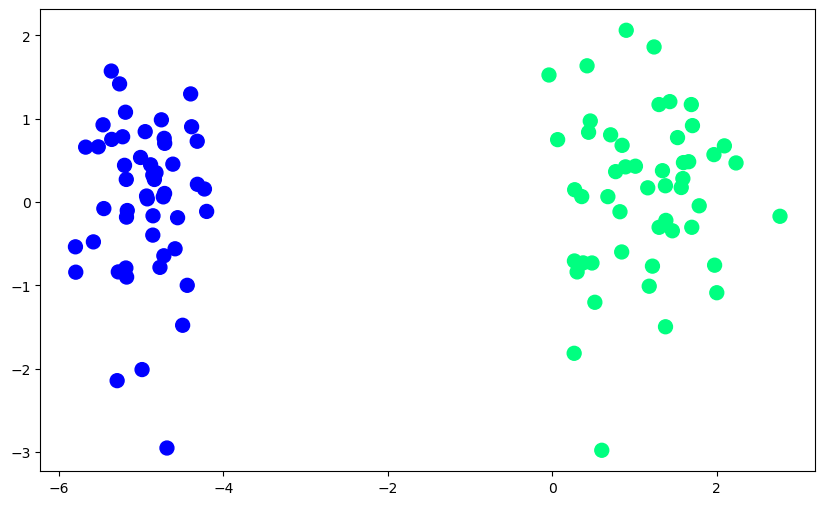

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [34]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis = 1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(1,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j] - y_hat)*x[j]
        
    return weights[0], weights[1:]

In [35]:
def step(z):
    return 1 if z>0 else 0

In [36]:
intercept_,coef_ = perceptron(x,y)

In [37]:
print(intercept_)

1.2000000000000002


In [38]:
print(coef_)

[1.08682872 0.52024363]


In [39]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [40]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input2 + b

(-3.0, 2.0)

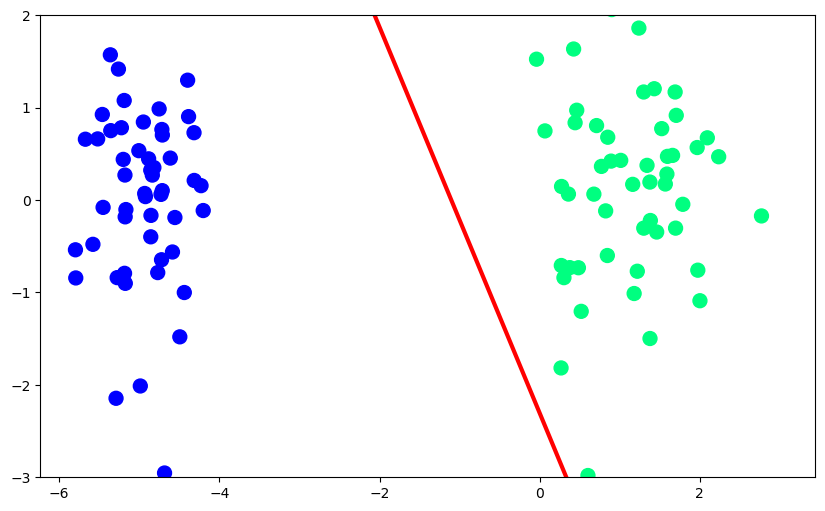

In [42]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [45]:
print(lor.coef_)
print(lor.intercept_)

[[1.77298737 0.0122258 ]]
[3.54861952]


In [46]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [47]:
x_input1 = np.linspace(-3,3,100)
y_input1 = x_input1*m +b

(-3.0, 2.0)

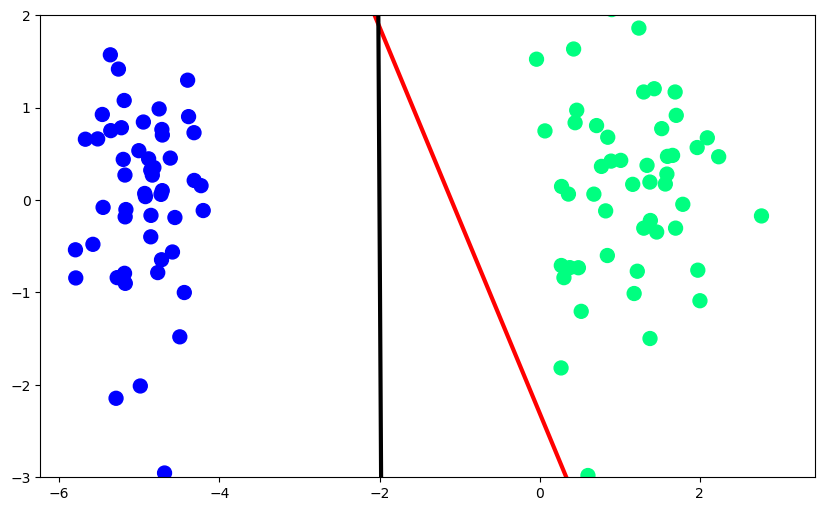

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [51]:
def perceptron(x,y):
    x = np.insert(x,0,1,axis = 1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(1,100)
        y_hat = sigmoid(np.dot(x[j],weights))
        weights += lr*(y[j] - y_hat)*x[j]
    return weights[0],weights[1:]

    


In [55]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [56]:
intercept_,coef_ = perceptron(x,y)

In [57]:
print(intercept_)

2.560097097950241


In [58]:
print(coef_)

[2.2853373  0.24931419]


In [59]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [60]:
x_input2 = np.linspace(-3,3,100)
y_input2 = x_input2*m +b

(-3.0, 2.0)

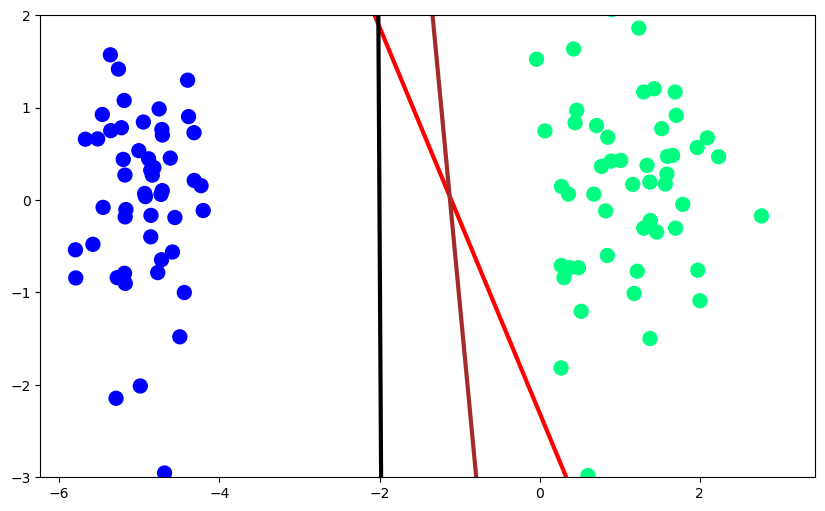

In [61]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [62]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [63]:
m,b = perceptron(x,y)

In [64]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


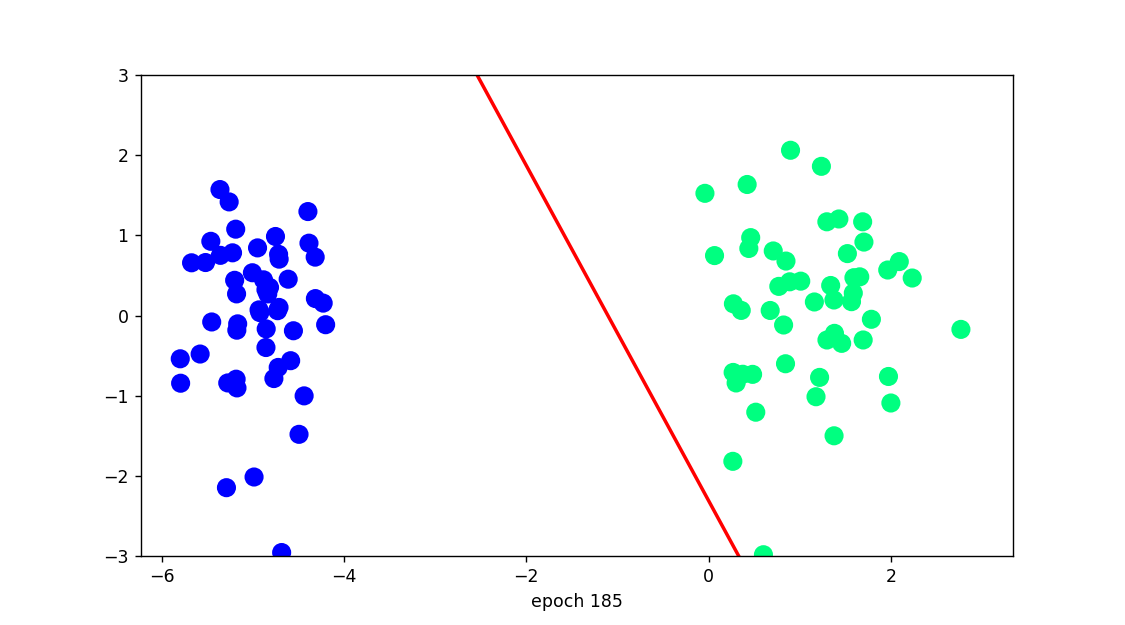

In [65]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)